# US Airline Sentiment Analysis - Exploratory Data Analysis

In this notebook, we will be conducting an Exploratory Data Analysis on a dataset containing tweets about various US airlines. This data was scraped from Febraury 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

- **Author:** [Sergio Cuéllar](https://www.linkedin.com/in/sergiocuellaralmagro/)
- **Date:** February 2023
- **Dataset:** [Kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)
- **Python Version:** 3.10.10

## Objectives

These are the main objectives of this exploratory data analysis:
- To gain an understanding of the characteristics of the dataset containing tweets about various US airlines.
- To explore the distribution of sentiment labels (positive, negative, and neutral) assigned to the tweets and identify any patterns or trends in the data.
- To analyze the negative reasons (such as "late flight" or "rude service") given by contributors and understand the most common reasons for negative sentiment.
- To identify any outliers, missing data or inconsistencies in the dataset that may need to be addressed before further analysis.
- To use various statistical and visualization techniques to summarize and present the findings from the analysis.

Overall, the goal of the EDA is to gain insights into the data and use those insights to inform further analysis, modeling and decision making.

---

## Library Imports and Setup

We will be using the following libraries for this analysis:

- **pandas:** For data manipulation and analysis.
- **numpy:** For numerical computing.
- **matplotlib:** For data visualization.
- **seaborn:** Runs on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
- **wordcloud:** For generating word clouds.


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

We will also be using the following settings to display the plots:

In [114]:
sns.set_style('darkgrid',{
    'axes.facecolor': '0.9',
    'grid.color': '0.8',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    })
sns.set_palette(['#2b2d42', '#8d99ae', 'edf2f4', '#ef233c', '#d90429'])

ValueError: Could not generate a palette for <map object at 0x0000019CC90BFAF0>

## Dataset Loading and Preliminary Inspection

In [ ]:
data = pd.read_csv('data/Tweets.csv')
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
shape = data.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns.') # Print the shape of the dataset in a readable format.

The dataset has 14640 rows and 15 columns.


In [ ]:
columns = data.columns

# Print the columns of the dataset in a readable format.
print('The columns are:')
for column in columns:
    print('\t',column)

The columns are:
	 tweet_id
	 airline_sentiment
	 airline_sentiment_confidence
	 negativereason
	 negativereason_confidence
	 airline
	 airline_sentiment_gold
	 name
	 negativereason_gold
	 retweet_count
	 text
	 tweet_coord
	 tweet_created
	 tweet_location
	 user_timezone


In [ ]:
# Print a summary of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# Get a summary of the numerical columns.
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
# Get a summary of the categorical columns.
data.describe(include=['O'])

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,14247,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,5,157,3744


In [ ]:
# Print the percentage of missing values in each column.
data.isnull().sum()/data.shape[0]*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

As we can conclude from this preliminary inspection, the dataset contains 14.640 tweets about US airlines. There are 4 numerical columns (tweet_id, airline_sentiment_confidence, negativereason_confidence, and retweet_count) and 11 categorical columns (airline, airline_sentiment, name, negativereason, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone, and user_timezone).

Some of the columns contain a very high percentage of missing values (airline_sentiment_gold, negativereason_gold and tweet_coord). We will need to decide whether to drop these columns or impute the missing values. We will discuss this further in the data cleaning section.

## Data Cleaning

In this section, we will be cleaning the data and addressing any missing values, outliers, or inconsistencies in the dataset.

### Converting tweet_created to datetime

In [ ]:
# Convert the date column to datetime format.
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  int64                                 
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   airline_sentiment_gold        40 non-null     object                                
 7   name                          14640 non-null  object                        

In [ ]:
date_min = data['tweet_created'].min()
date_max = data['tweet_created'].max()

print(f'The dataset contains tweets from {date_min} to {date_max}.') # Print the date range of the dataset.

The dataset contains tweets from 2015-02-16 23:36:05-08:00 to 2015-02-24 11:53:37-08:00.


### Dealing with columns containing missing values

As we concluded earlier, there are 3 columns with a percentage of over 90% of missing values: airline_sentiment_gold, negativereason_gold and tweet_coord. We will drop these columns from the dataset, as they will not be providing any useful information for our analysis.

In [ ]:
def columns_drop(df, columns):
    '''Drops columns from a dataframe'''
    return df.drop(columns, axis=1)

# Drop columns with more than 90% missing values.
data = columns_drop(data, ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  int64                                 
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   name                          14640 non-null  object                                
 7   retweet_count                 14640 non-null  int64                         

Let's now take a look at the remaining columns with missing values. We will be checking column by column to see if we can impute the missing values.

In [ ]:
# Print the percentage of missing values in each column.
data.isnull().sum()/data.shape[0]*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

#### 'negativereason' column

In [ ]:
data.negativereason.unique() # Print the unique values in the negativereason column.

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [ ]:
data.groupby('negativereason').size().sort_values(ascending=False) # Print the number of tweets for each negative reason.

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
dtype: int64

We will be replacing the missing values in the 'negativereason' column with the string 'Can't Tell', as they are tweets that were classified as negative but no reason was given.

In [ ]:
# Replace the missing values in the negativereason column with 'Can't Tell'.
data['negativereason'].fillna("Can't Tell", inplace=True)
data.groupby('negativereason').size().sort_values(ascending=False) # Print the number of tweets for each negative reason after imputation.

negativereason
Can't Tell                     6652
Customer Service Issue         2910
Late Flight                    1665
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
dtype: int64

In [ ]:
# Check if there are any missing values in the negativereason column.
data['negativereason'].isnull().sum()

0

#### 'negativereason_confidence' column

Since this is a numerical column, we will be replacing the missing values with the mean of the column.

In [ ]:
# Calculate the mean of the negativereason_confidence column.
negativereason_confidence_mean = data['negativereason_confidence'].mean()

# Replace the missing values in the negativereason_confidence column with the mean.
data['negativereason_confidence'].fillna(negativereason_confidence_mean, inplace=True)

In [ ]:
# Check if there are any missing values in the negativereason_confidence column.
data['negativereason_confidence'].isnull().sum()

0

#### 'tweet_location' column

This column contains the location of the tweet. Around 32% of the values are missing, so we will be replacing the missing values with the string 'Unknown'. We will also be merging the locations that are very similar, such as 'New York' and 'New York City'. We will only be doing this for the top 25 locations, as there are many different locations in the dataset.

In [ ]:
# Print the number of unique values in the tweet_location column.
print(f'There are {data.tweet_location.nunique()} unique values in the tweet_location column.')

There are 3081 unique values in the tweet_location column.


In [ ]:
data.groupby('tweet_location').size().sort_values(ascending=False).head(20) # Print the top 25 locations with the most tweets.

tweet_location
Boston, MA           157
New York, NY         156
Washington, DC       150
New York             127
USA                  126
Chicago              104
New York City         96
Los Angeles, CA       96
NYC                   95
San Francisco, CA     91
San Francisco         86
Chicago, IL           81
Brooklyn, NY          66
Los Angeles           64
Austin, TX            64
Washington, D.C.      63
Boston                62
Dallas, TX            54
Washington DC         53
Nashville, TN         45
dtype: int64

We will be merging the locations tags that point to the same location. These are the locations that we will be merging:
- 'New York', 'New York, NY', 'New York City' will be merged into 'New York, NY'.
- 'Boston, MA' and 'Boston' will be merged into 'Boston, MA'.
- 'Washington, DC' and 'Washington, D.C.' will be merged into 'Washington, DC'.
- 'Los Angeles, CA' and 'Los Angeles' will be merged into 'Los Angeles, CA'.
- 'San Francisco, CA' and 'San Francisco' will be merged into 'San Francisco, CA'.
- 'Chicago, IL' and 'Chicago' will be merged into 'Chicago, IL'.



In [ ]:
# Merge all the locations that refer to New York into 'New York, NY'.
data['tweet_location'] = data['tweet_location'].replace(['New York', 'New York City', 'NY', 'NYC', 'New York, New York'], 'New York, NY')

# Merge 'Boston, MA' and 'Boston' into 'Boston, MA'.
data['tweet_location'] = data['tweet_location'].replace('Boston', 'Boston, MA')

# Merge 'Washington, DC' and 'Washington, D.C.' into 'Washington, DC'.
data['tweet_location'] = data['tweet_location'].replace(['Washington, D.C.', 'DC', 'Washington DC'], 'Washington, DC')

# Merge 'Los Angeles, CA' and 'Los Angeles' into 'Los Angeles, CA'.
data['tweet_location'] = data['tweet_location'].replace('Los Angeles', 'Los Angeles, CA')

# Merge 'San Francisco, CA' and 'San Francisco' into 'San Francisco, CA'.
data['tweet_location'] = data['tweet_location'].replace('San Francisco', 'San Francisco, CA')

# Merge 'Chicago, IL' and 'Chicago' into 'Chicago, IL'.
data['tweet_location'] = data['tweet_location'].replace('Chicago', 'Chicago, IL')


In [ ]:
# Print the top 25 locations with the most tweets after merging.
data.groupby('tweet_location').size().sort_values(ascending=False).head(25)


tweet_location
New York, NY                   547
Washington, DC                 294
Boston, MA                     219
Chicago, IL                    185
San Francisco, CA              177
Los Angeles, CA                160
USA                            126
Brooklyn, NY                    66
Austin, TX                      64
Dallas, TX                      54
Nashville, TN                   45
Texas                           42
Philadelphia, PA                38
San Diego                       38
Denver, CO                      37
Houston, TX                     35
Seattle                         34
Global                          34
Logan International Airport     32
London                          30
Las Vegas, NV                   30
New Jersey                      29
Raleigh, NC                     28
Pekin                           28
Arlington, VA                   27
dtype: int64

We will now be replacing the remaining missing values in the 'tweet_location' column with the string 'Unknown'.

In [ ]:
# Check the number of missing values in the tweet_location column.
data['tweet_location'].isnull().sum()

4733

In [ ]:
# Replace the missing values in the tweet_location column with 'Unknown'.
data['tweet_location'].fillna('Unknown', inplace=True)

In [ ]:
# Check if there are any missing values in the tweet_location column.
data['tweet_location'].isnull().sum()

0

#### 'user_timezone' column

We will be replacing the missing values in the 'user_timezone' column with the string 'Unknown'.

In [ ]:
# Print the number of missing values in the user_timezone column.
data['user_timezone'].isnull().sum()

4820

In [ ]:
# Replace the missing values in the user_timezone column with 'Unknown'.
data['user_timezone'].fillna('Unknown', inplace=True)

In [ ]:
# Check if there are any missing values in the user_timezone column.
data['user_timezone'].isnull().sum()

0

## Exploratory Data Analysis

This section will involve conducting an exploratory data analysis of the dataset, wherein we will examine the distribution of sentiment labels (positive, negative, and neutral) assigned to the tweets. Our objective will be to detect patterns or trends in the data. Additionally, we will scrutinize the negative reasons given by contributors (such as "late flight" or "rude service") to understand the most frequently occurring reasons for negative sentiment.

### Distribution of Sentiment Labels

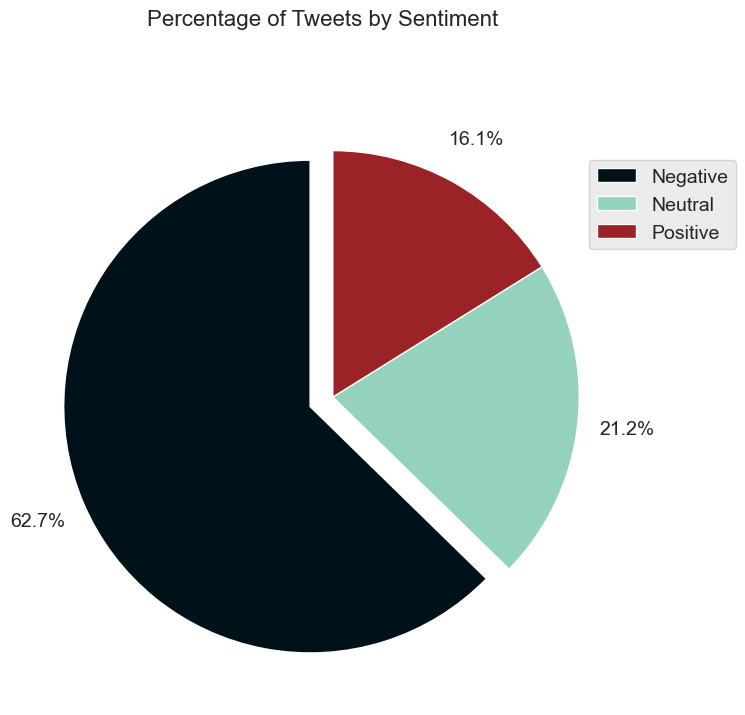

In [142]:
# Plot the distribution of the airline_sentiment column in a pie chart.
fig = plt.figure(figsize=(8,8))
fig.suptitle('Percentage of Tweets by Sentiment', fontsize=16)

fig1 = data.groupby('airline_sentiment').size().plot(kind='pie', 
                                                     autopct='%1.1f%%', 
                                                     fontsize=14, 
                                                     startangle=90, 
                                                     explode=(0.1,0,0), 
                                                     colors=['#001219','#94d2bd','#9b2226'],
                                                     labeldistance=1.1,
                                                     pctdistance=1.2,
                                                     labels=None)

# Add a legend.
fig1.legend(labels=['Negative', 'Neutral', 'Positive'],
            loc='upper left',
            bbox_to_anchor=(0.9, 0.9),
            fontsize=14)



### Distribution of Sentiment Labels by Airline

Text(0, 0.5, 'Number of tweets')

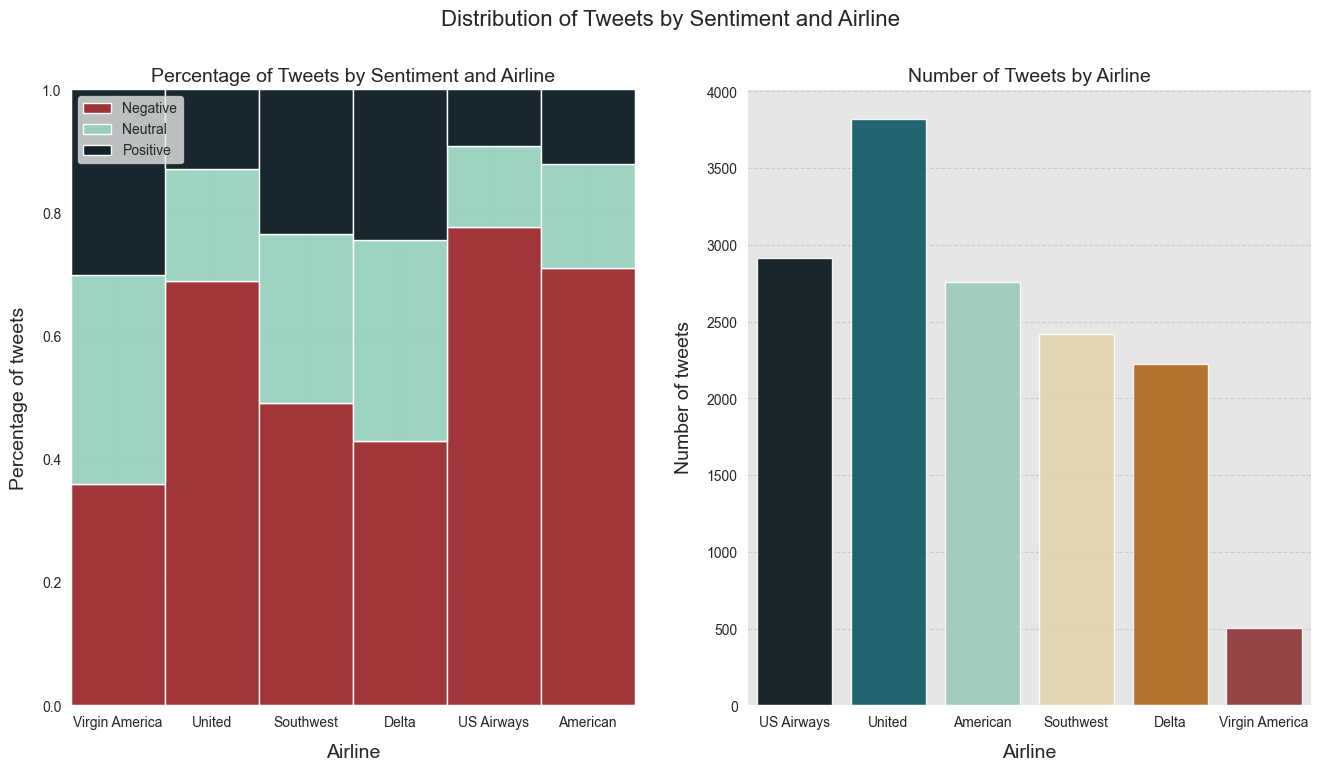

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Distribution of Tweets by Sentiment and Airline', fontsize=16)

# Plot the distribution of the airline_sentiment column by airline in a histogram.
fig2 = sns.histplot(data=data, x='airline', 
                    hue='airline_sentiment',
                    hue_order=['positive', 'neutral', 'negative'], 
                    multiple='fill', 
                    palette=['#001219','#94d2bd','#9b2226'],
                    alpha=0.9,
                    ax=ax[0])

fig2.set_title('Percentage of Tweets by Sentiment and Airline', fontsize=14)
fig2.set_xlabel('Airline', fontsize=14, labelpad=10)
fig2.set_ylabel('Percentage of tweets', fontsize=14, labelpad=10)
fig2.legend(labels=['Negative', 'Neutral', 'Positive'], fontsize=10)

fig3 = sns.countplot(data=data, x='airline',
                        order=['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America'],
                        palette=['#001219','#005f73', '#94d2bd', '#e9d8a6', '#ca6702', '#9b2226'],
                        alpha=0.9,
                        ax=ax[1])

fig3.set_title('Number of Tweets by Airline', fontsize=14)
fig3.set_xlabel('Airline', fontsize=14, labelpad=10)
fig3.set_ylabel('Number of tweets', fontsize=14, labelpad=10)


As we can see, some airlines have a higher percentage of negative tweets than others. For example, US Airways has the highest percentage of negative tweets (around 75%), while Virgin America has the lowest percentage of negative tweets (less than 40%).

However, it's important to keep in mind that some airlines have a much higher number of tweets than others. For example, United has almost 3 times more tweets than Virgin America. Therefore, we should not only look at the percentage of negative tweets, but also the number of tweets for each airline.

We will now be performing a 'by airline' analysis to see what are the most common negative and positive reasons for each airline. We will also be taking into account other factors, such as the location of the tweet.

### Virgin America

Text(0.5, 1.0, 'Virgin America')

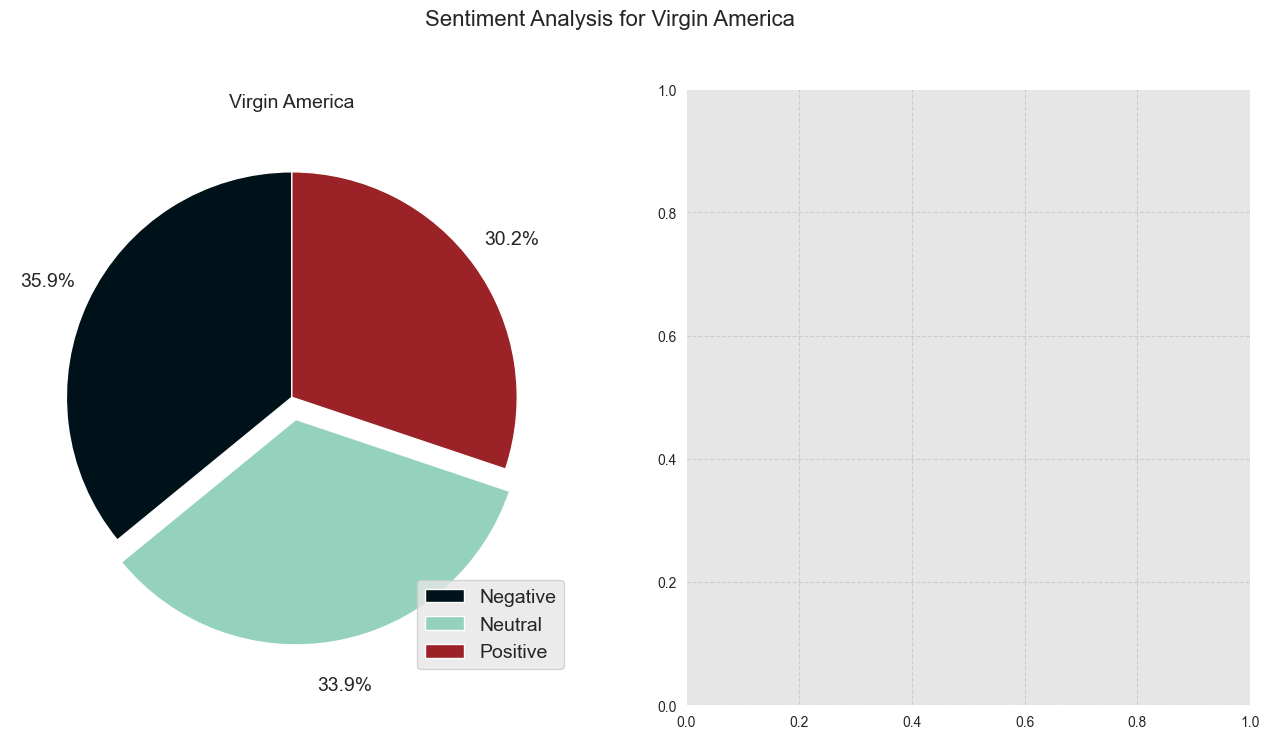

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Sentiment Analysis for Virgin America', fontsize=16)

# Plot the distribution of the airline_sentiment column for this airline as a pie chart.

fig4 = data[data['airline'] == 'Virgin America'].groupby('airline_sentiment').size().plot(kind='pie',
                                                                                            autopct='%1.1f%%',
                                                                                            fontsize=14,
                                                                                            startangle=90,
                                                                                            explode=(0,0.1,0),
                                                                                            colors=['#001219','#94d2bd','#9b2226'],
                                                                                            labeldistance=1.1,
                                                                                            pctdistance=1.2,
                                                                                            labels=None,
                                                                                            ax=ax[0])

fig4.legend(labels=['Negative', 'Neutral', 'Positive'],
            loc='lower right',
            fontsize=14)
fig4.set_title('Virgin America', fontsize=14)
